In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

### 1. Data Loading and Preprocessing

In [4]:
data = pd.read_csv('fraud.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [5]:
data.shape

(555719, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [7]:
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [8]:
# convert transaction time into seperate columns
'''
date_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

data['trans_date'] = date_time.dt.date[0]
data['trans_time'] = date_time.dt.time[0]
'''

"\ndate_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')\n\ndata['trans_date'] = date_time.dt.date[0]\ndata['trans_time'] = date_time.dt.time[0]\n"

In [9]:
# Extract useful numeric features
date_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

data['year'] = date_time.dt.year
data['month'] = date_time.dt.month
data['day'] = date_time.dt.day
data['hour'] = date_time.dt.hour
data['minute'] = date_time.dt.minute

In [10]:
# convert date of birth to age
from datetime import datetime
data['dob'] = pd.to_datetime(data['dob'], dayfirst = True)
current_date = datetime.now()
data['age'] = (current_date - data['dob']).dt.days // 365

In [11]:
data.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city_pop', 'dob', 'trans_num'], inplace=True)

In [12]:
data.head(3)

,merchant,category,amt,gender,city,state,zip,lat,long,job,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,Mechanical engineer,1371816865,33.986391,-81.200714,0,2020,6,21,12,14,57
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2020,6,21,12,14,35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,"Librarian, public",1371816893,40.495810,-74.196111,0,2020,6,21,12,14,54


In [13]:
data.shape

(555719, 20)

In [14]:
# encoding
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

In [15]:
# List of categorical columns you want to frequency encode
cat_cols = ['merchant', 'category', 'city', 'state', 'job']

# Loop through each column and apply frequency encoding
for col in cat_cols:
    freq_map = data[col].value_counts()
    data[col + '_freq'] = data[col].map(freq_map)

In [16]:
data.drop(columns=['merchant', 'category', 'city', 'state', 'job'], inplace=True)

In [17]:
data.head(3)

,amt,gender,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age,merchant_freq,category_freq,city_freq,state_freq,job_freq
0,2.86,0,29209,33.9659,-80.9355,1371816865,33.986391,-81.200714,0,2020,6,21,12,14,57,736,39327,640,12541,2430
1,29.84,1,84002,40.3207,-110.4360,1371816873,39.450498,-109.960431,0,2020,6,21,12,14,35,785,39327,837,4658,2535
2,41.28,1,11710,40.6729,-73.5365,1371816893,40.495810,-74.196111,0,2020,6,21,12,14,54,755,36674,1073,35918,2587


In [18]:
data.shape

(555719, 20)

### 3. Model Building and Evaluation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline

In [21]:
# split the data into train and test sets

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.head(3)

,amt,gender,zip,lat,long,unix_time,merch_lat,merch_long,year,month,day,hour,minute,age,merchant_freq,category_freq,city_freq,state_freq,job_freq
139526,61.74,0,20012,38.9757,-77.0282,1376047844,38.368797,-76.170115,2020,8,9,11,30,54,1118,56370,1517,1517,1098
395747,186.93,1,29911,32.9413,-81.1807,1385219474,32.342834,-81.123567,2020,11,23,15,11,50,703,34574,1151,12541,1971
395119,127.61,0,86018,35.2563,-111.9500,1385204770,36.255327,-112.176851,2020,11,23,11,6,68,1101,52553,414,4592,1272


In [23]:
# handle imbalancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##### Feedforward Neural Network

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Build the Neural Network (using Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\wyu30\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
history = model.fit(X_train_scaled, y_train_resampled,
                    validation_data=(X_test_scaled, y_test),
                    epochs=20,
                    batch_size=256,
                    verbose=1)

Epoch 1/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8594 - loss: 0.3328 - val_accuracy: 0.9385 - val_loss: 0.1951
Epoch 2/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9066 - loss: 0.2284 - val_accuracy: 0.9476 - val_loss: 0.1550
Epoch 3/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9181 - loss: 0.2017 - val_accuracy: 0.9513 - val_loss: 0.1407
Epoch 4/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9246 - loss: 0.1881 - val_accuracy: 0.9579 - val_loss: 0.1274
Epoch 5/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9275 - loss: 0.1801 - val_accuracy: 0.9581 - val_loss: 0.1237
Epoch 6/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9296 - loss: 0.1765 - val_accuracy: 0.9620 - val_loss: 0.1136
Epoch 7/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9318 - loss: 0.1710 - val_accuracy: 0.9608 - val_loss: 0.1161
Epoch 8/20
3460/3460 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9327 - loss: 0.1687 -

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_proba >= 0.6).astype(int)

print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

3474/3474 ━━━━━━━━━━━━━━━━━━━━ 2s 552us/step
[[108163   2555]
 [    74    352]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110718
           1       0.12      0.83      0.21       426

    accuracy                           0.98    111144
   macro avg       0.56      0.90      0.60    111144
weighted avg       1.00      0.98      0.99    111144

AUC: 0.964956629230273


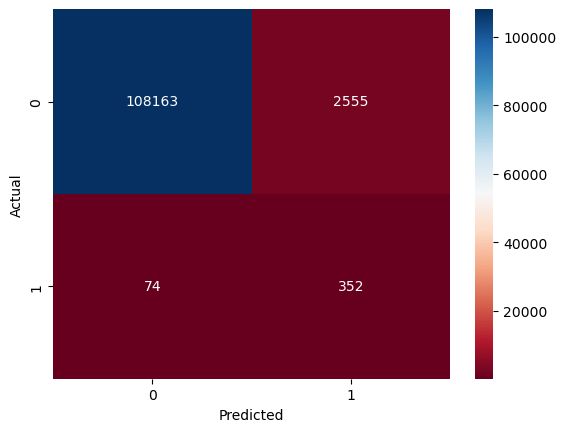

In [30]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

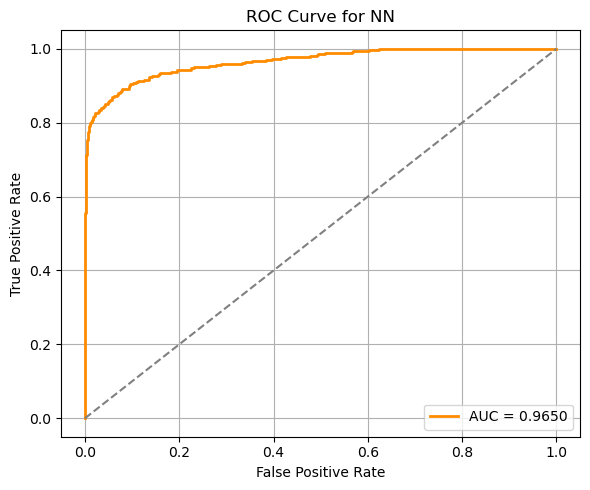

In [59]:
from sklearn.metrics import roc_curve

# Compute FPR, TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()